<a href="https://colab.research.google.com/github/Raatexx/Raatexx/blob/main/Copy_of_Projeto_em_Equipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Se ainda não o fez, pressione:**

`Arquivo` -> `Salvar uma cópia no Drive`

**para copiar este caderno para sua unidade do Google e trabalhar em uma cópia. Se não fizer isso, suas alterações não serão salvas!**

---

Instruções: Em cada seção, você deve substituir o `XXXXX` que vê no código!

---

# Preparação de Dados

Este será um modelo de regressão tentando prever o saida. Demos uma dica para pelo menos um atributo usar.

Real Madruga descomente o seguinte

In [ ]:
# # Caminho para o arquivo CSV
# caminho_do_arquivo = 'https://github.com/MMembreno/MISTI-Brasil-Soccer-Analytics-GTL/blob/main/Dados/Projeto/D_classifica%C3%A7%C3%B5es_dos_jogadores.csv'

# saida = 'Classificacao do Jogador'
# atributos = 'Gols'

LOCK'S descomente o seguinte

In [ ]:
# # Caminho para o arquivo CSV
# caminho_do_arquivo = 'https://raw.githubusercontent.com/MMembreno/MISTI-Brasil-Soccer-Analytics-GTL/main/Dados/Projeto/A_partidas_de_futebol.csv'

# saida = 'Diferenca de Golos da Equipa da Casa'
# atributos = 'Posicao da Equipa da Casa na Liga'

Grêngo descomente o seguinte

In [1]:
# # Caminho para o arquivo CSV
caminho_do_arquivo = 'https://raw.githubusercontent.com/MMembreno/MISTI-Brasil-Soccer-Analytics-GTL/main/Dados/Projeto/F_violencia_entre_torcidas.csv'

saida = 'Gravidade dos Incidentes'
atributos = 'Rivalidade Historica'

## Passo 0: Importar Pacotes

In [2]:
import pandas as pd # Importa o pacote Pandas, útil para manipulação de dados

## Passo 1: Importar Dados

In [3]:
# Ler os dados para um DataFrame do Pandas
df = pd.read_csv(caminho_do_arquivo)
# 'df' é a abreviação de DataFrame, uma estrutura de dados similar a uma tabela.

## Passo 2: Explorar dados

Tente visualizar algumas coisas com o que usamos no Colab Notebook 2 e 3.

Para a saida, calcule a média, o desvio padrão e tente traçar a distribuição normal com base naqueles com plotar_uma_distribuicao_normal()



In [4]:
# NumPy é uma biblioteca fundamental para computação científica em Python. Ela oferece suporte para arrays (semelhantes a listas,
# mas com funcionalidades aprimoradas), matrizes e uma infinidade de operações matemáticas sobre essas estruturas de dados. É
# amplamente utilizada em diversas áreas da ciência e engenharia por suas estruturas de dados poderosas que podem lidar com
# grandes conjuntos de dados e dados multidimensionais de forma eficiente.

import numpy as np

# O módulo stats do SciPy é parte da biblioteca SciPy, que é usada para computação científica e técnica. O 'norm' do scipy.stats
# é especificamente utilizado para criar e trabalhar com uma distribuição normal (Gaussiana). Ele fornece ferramentas para gerar
# variáveis aleatórias, calcular funções de densidade de probabilidade, funções de distribuição acumulada e muito mais. É
# essencial para análise estatística e é uma pedra angular em campos como economia, psicologia, biologia e engenharia.

from scipy.stats import norm

# Já vimos isso
import matplotlib.pyplot as plt

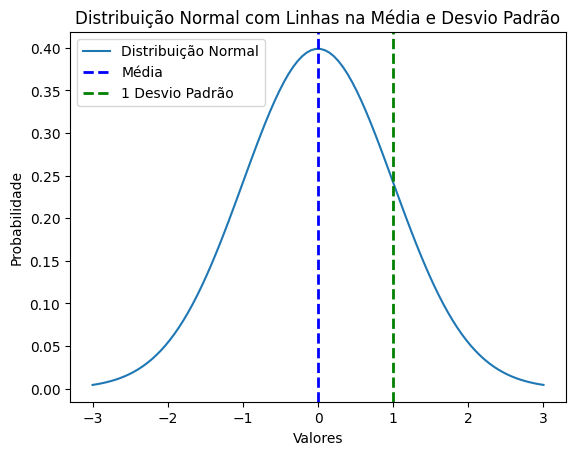

In [5]:
# Definição de função auxiliar para você usar. Veja quais são as entradas
# e o exemplo também.
def plotar_uma_distribuicao_normal(media, desvio_padrao, valor_linha_media, valor_linha_desvio):
    """
    Função para plotar uma distribuição normal com linhas verticais na média e no desvio padrão.

    Parâmetros:
    media (float): A média da distribuição normal.
    desvio_padrao (float): O desvio padrão da distribuição normal.
    valor_linha_media (float): O valor onde a linha vertical da média será plotada.
    valor_linha_desvio (float): O valor onde a linha vertical de um desvio padrão será plotada.
    """

    # Gerando pontos no eixo x para a distribuição
    pontos = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)

    # Calculando a probabilidade de cada ponto para a distribuição
    plt.plot(pontos, norm.pdf(pontos, media, desvio_padrao), label='Distribuição Normal')

    # Adicionando uma linha vertical azul na média
    plt.axvline(valor_linha_media, color='b', linestyle='dashed', linewidth=2, label='Média')

    # Adicionando uma linha vertical verde em um desvio padrão
    plt.axvline(valor_linha_desvio, color='g', linestyle='dashed', linewidth=2, label='1 Desvio Padrão')

    # Adicionando título, rótulos e legenda
    plt.title('Distribuição Normal com Linhas na Média e Desvio Padrão')
    plt.xlabel('Valores')
    plt.ylabel('Probabilidade')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

# Exemplo de uso da função
# media=0 sintaxe é como definir a função nas entradas em vez de nas linhas antes de usar a função.
plotar_uma_distribuicao_normal(media=0, desvio_padrao=1, valor_linha_media=0, valor_linha_desvio=1)


## Passo 3: Divisão de treinamento/teste

Para entender isso um pouco mais, vamos dar uma olhada apenas nas primeiras dez linhas dos dados que importamos

Em seguida, ampliaremos todo o conjunto de dados

In [15]:
# Vamos visualizar alguns dados, vamos extrair apenas os primeiros 10 pontos de dados
df10 = df.head(10)
print(df10)

   Gravidade dos Incidentes  Rivalidade Historica  \
0                  4.712569                     3   
1                  0.500000                     1   
2                  0.991405                     4   
3                  4.297446                     5   
4                  5.374168                     2   
5                  2.435064                     2   
6                  4.063877                     2   
7                  3.269295                     5   
8                  1.975955                     0   
9                  2.484344                     5   

   Distancia entre Cidades dos Times  Consumo de Alcool  \
0                                 54                  4   
1                                487                  0   
2                                215                  0   
3                                495                  3   
4                                 74                  4   
5                                557                  2   
6  

In [7]:
# A função 'train_test_split' da biblioteca scikit-learn é utilizada para dividir
# arrays ou matrizes de dados em dois subconjuntos:
# um para treinamento e outro para teste. Isso é útil para avaliar a performance
# de um modelo de machine learning de forma justa,
# usando o conjunto de teste que não foi visto pelo modelo durante o treinamento.
from sklearn.model_selection import train_test_split

In [8]:
# let's start by creating a simple list from 0 - 9
lista = list(range(10))
print(lista)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
# now let's use this list and train/test split
# to start, we need to set what split % we want
# in the function train_test_split
# percent of test, 0.2 = 20%. That means train is what is remaining = 100% - 20% = 80%
teste_percentual = 0.2

# this randomly splits up the list, see how it gets split up
# keep running this cell and see how the values change
lista_trein, lista_teste = train_test_split(lista, test_size=teste_percentual)
print('Lista treinamento', lista_trein)
print('Lista test', lista_teste)

Lista treinamento [7, 3, 6, 9, 1, 0, 2, 4]
Lista test [8, 5]


In [13]:
# now we will introduce this thing call the random state
# random state is essentially a way for us to reproduce results for this "random" assortment
# so now keep running this script, do the values change?
lista_trein, lista_teste = train_test_split(lista, test_size=teste_percentual, random_state=144)
print('Lista treinamento', lista_trein)
print('Lista test', lista_teste)

# now change the number to the right of random_state=XXXXX and see how the values change
# after you are done changing it, please change it back to random_state=123
# this will be the default value of the workshop

Lista treinamento [0, 4, 2, 3, 9, 6, 8, 7]
Lista test [5, 1]


In [14]:
# Now lets do it with our data set, pay attention to the indices and how they
# match up to the order of the list above (remember to keep random_state=123)
df_trein, df_teste = train_test_split(df10, test_size=teste_percentual, random_state=313)
print('Dados treinamento', lista_trein)
print('Dados test', lista_teste)

Dados treinamento [0, 4, 2, 3, 9, 6, 8, 7]
Dados test [5, 1]


# Gran trabajo!!! Lo hiciste. | Great job!!! You did it. 😃